In [46]:
# step1_data_fetch.py

import yfinance as yf
import pandas as pd


def fetch_data(tickers, start_date, end_date):
    price_data = {}  # Dictionary to hold Series

    for ticker in tickers:
        print(f"\n🔍 Fetching data for: {ticker}...")
        data = yf.download(ticker, start=start_date, end=end_date)

        if data.empty:
            print(f"❌ No data returned for {ticker}")
            continue

        # Prefer 'Adj Close', else use 'Close'
        adj_close = data.get("Adj Close")
        close = data.get("Close")

        if adj_close is not None:
            price_data[ticker] = adj_close
            print(f"✅ Using 'Adj Close' for {ticker}")
        elif close is not None:
            price_data[ticker] = close
            print(f"⚠️ Using 'Close' for {ticker}")
        else:
            print(f"❌ No usable price data for {ticker}")

    if not price_data:
        raise ValueError("❌ No valid stock data fetched. Please check tickers and date range.")

    # Combine into DataFrame
    df_prices = pd.concat(price_data.values(), axis=1)
    df_prices.columns = list(price_data.keys())
    return df_prices


def main():
    tickers_input = input("Enter stock tickers (comma-separated): ")
    tickers = [t.strip().upper() for t in tickers_input.split(",")]
    start_date = input("Enter start date (YYYY-MM-DD): ")
    end_date = input("Enter end date (YYYY-MM-DD): ")

    try:
        df = fetch_data(tickers, start_date, end_date)
        print("\n📈 Sample of fetched stock data:")
        print(df.head())

        # Optional: Save to CSV for further use
        df.to_csv("stock_prices1.csv")
        print("✅ Data saved to stock_prices.csv")

    except ValueError as e:
        print(f"\n❗ Error: {e}")


if __name__ == "__main__":
    main()



🔍 Fetching data for: AAPL...


C:\Users\javed\AppData\Local\Temp\ipykernel_26620\2606832802.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\javed\AppData\Local\Temp\ipykernel_26620\2606832802.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\javed\AppData\Local\Temp\ipykernel_26620\2606832802.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

⚠️ Using 'Close' for AAPL

🔍 Fetching data for: MSFT...
⚠️ Using 'Close' for MSFT

🔍 Fetching data for: TSLA...
⚠️ Using 'Close' for TSLA

📈 Sample of fetched stock data:
                  AAPL        MSFT        TSLA
Date                                          
2022-01-03  178.645645  325.038086  399.926666
2022-01-04  176.378357  319.464569  383.196655
2022-01-05  171.686661  307.200989  362.706665
2022-01-06  168.820679  304.773560  354.899994
2022-01-07  168.987564  304.928894  342.320007
✅ Data saved to stock_prices.csv



✅ Data loaded successfully.
                  AAPL        MSFT        TSLA
Date                                          
2022-01-03  178.645615  325.038055  399.926666
2022-01-04  176.378357  319.464569  383.196655
2022-01-05  171.686676  307.201050  362.706665
2022-01-06  168.820679  304.773529  354.899994
2022-01-07  168.987518  304.928925  342.320007


C:\Users\javed\AppData\Local\Temp\ipykernel_26620\2480489172.py:15: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\portfoio project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


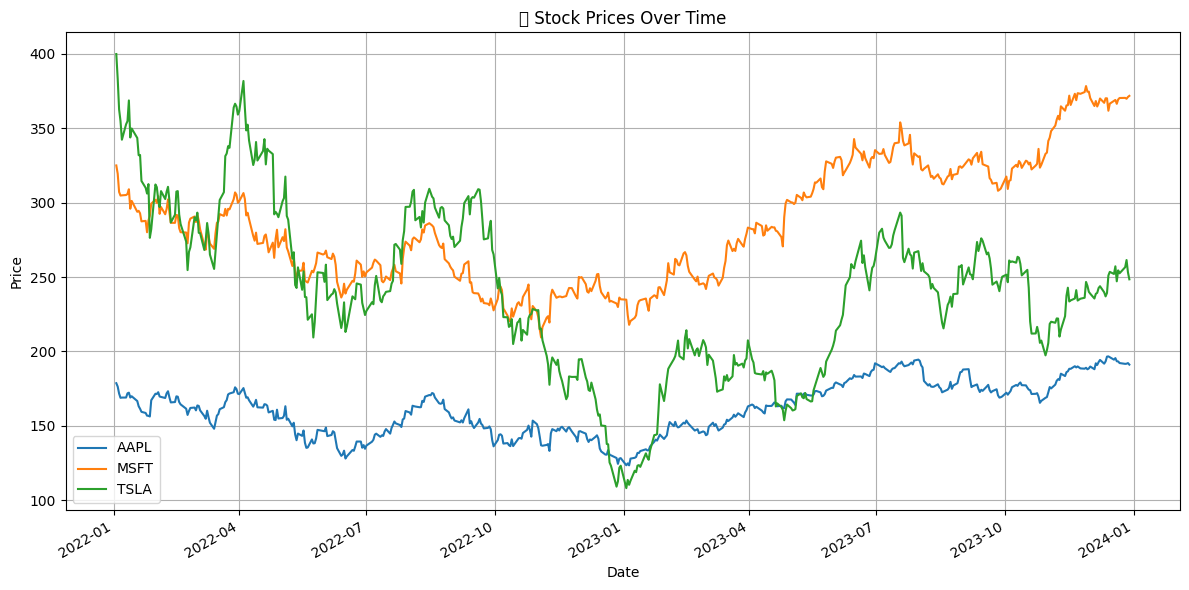


📊 Daily returns sample:
                AAPL      MSFT      TSLA
Date                                    
2022-01-04 -0.012691 -0.017147 -0.041833
2022-01-05 -0.026600 -0.038388 -0.053471
2022-01-06 -0.016693 -0.007902 -0.021523
2022-01-07  0.000988  0.000510 -0.035447
2022-01-10  0.000116  0.000732  0.030342


C:\Users\javed\AppData\Local\Temp\ipykernel_26620\2480489172.py:23: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\portfoio project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


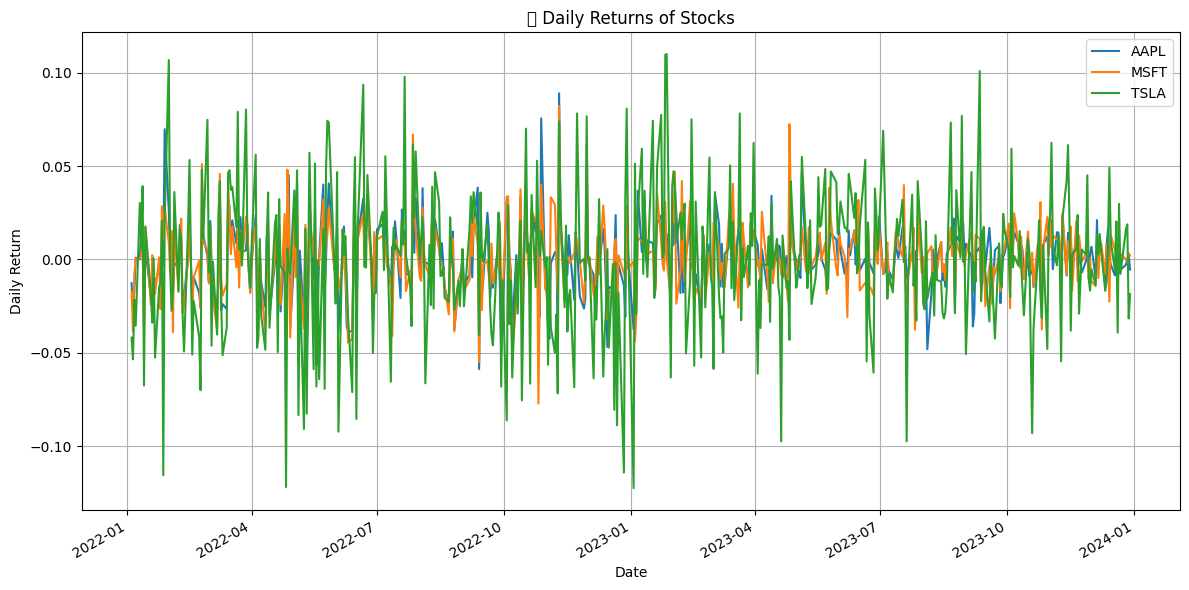

✅ Daily returns saved to daily_returns.csv


In [50]:
# step2_returns_analysis.py

import pandas as pd
import matplotlib.pyplot as plt

def calculate_daily_returns(price_df):
    daily_returns = price_df.pct_change().dropna()
    return daily_returns

def plot_prices(price_df):
    price_df.plot(figsize=(12, 6), title="📈 Stock Prices Over Time")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_daily_returns(daily_returns):
    daily_returns.plot(figsize=(12, 6), title="📊 Daily Returns of Stocks")
    plt.xlabel("Date")
    plt.ylabel("Daily Return")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def main():
    # Load the CSV created in Step 1
    price_df = pd.read_csv("stock_prices.csv", index_col=0, parse_dates=True)

    print("\n✅ Data loaded successfully.")
    print(price_df.head())

    # Plot the stock prices
    plot_prices(price_df)

    # Calculate and plot daily returns
    daily_returns = calculate_daily_returns(price_df)
    print("\n📊 Daily returns sample:")
    print(daily_returns.head())

    plot_daily_returns(daily_returns)

    # Optional: Save daily returns for later steps
    daily_returns.to_csv("daily_returns.csv")
    print("✅ Daily returns saved to daily_returns.csv")

if __name__ == "__main__":
    main()



Available Stocks: ['AAPL', 'MSFT', 'TSLA']

📊 Expected Annual Return: 4.43%
📉 Portfolio Volatility: 34.16%
💡 Sharpe Ratio: 0.13


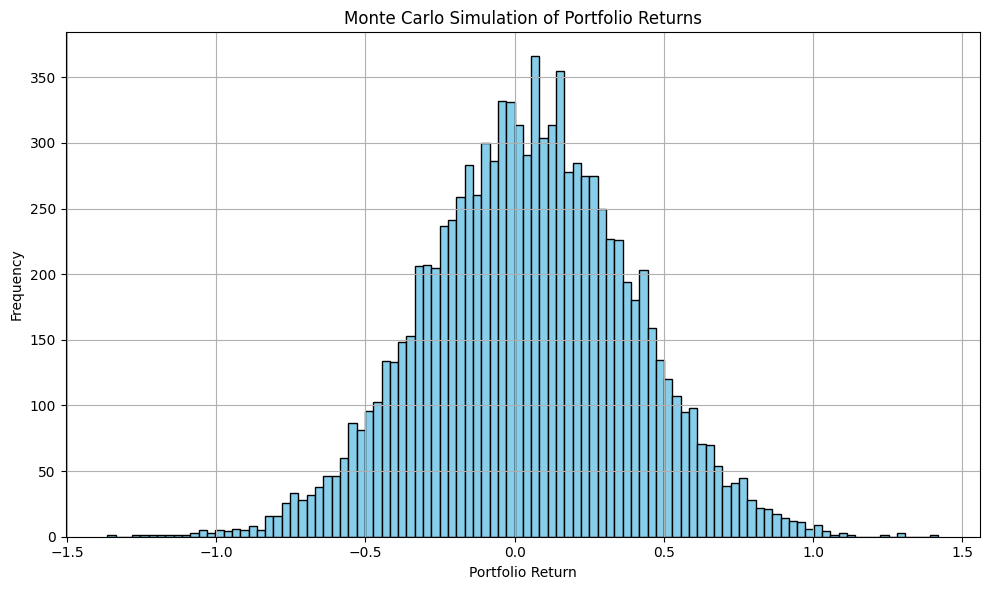


📉 5% Value at Risk (VaR): -0.52


In [51]:
# step3_portfolio_risk_simulation.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calculate_portfolio_performance(returns, weights):
    expected_return = np.sum(returns.mean() * weights) * 252
    expected_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    sharpe_ratio = expected_return / expected_volatility
    return expected_return, expected_volatility, sharpe_ratio

def monte_carlo_simulation(daily_returns, weights, simulations=10000, days=252):
    mean_returns = daily_returns.mean()
    cov_matrix = daily_returns.cov()

    portfolio_returns = []
    for _ in range(simulations):
        # Simulate daily returns for each stock
        daily_simulated = np.random.multivariate_normal(mean_returns, cov_matrix, days)
        # Calculate simulated portfolio return for each simulation
        portfolio_return = np.dot(daily_simulated, weights).sum()
        portfolio_returns.append(portfolio_return)

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.hist(portfolio_returns, bins=100, color='skyblue', edgecolor='black')
    plt.title("Monte Carlo Simulation of Portfolio Returns")
    plt.xlabel("Portfolio Return")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 5% Value at Risk (VaR)
    var_95 = np.percentile(portfolio_returns, 5)
    print(f"\n📉 5% Value at Risk (VaR): {var_95:.2f}")
    return var_95

def main():
    df = pd.read_csv("daily_returns.csv", index_col=0)

    tickers = df.columns.tolist()
    print(f"\nAvailable Stocks: {tickers}")

    # Ask user to input weights or use equal weight
    user_input = input("\nDo you want to enter custom weights? (y/n): ").lower()

    if user_input == 'y':
        weights = []
        for ticker in tickers:
            w = float(input(f"Weight for {ticker} (0-1): "))
            weights.append(w)
        weights = np.array(weights)
    else:
        weights = np.array([1 / len(tickers)] * len(tickers))  # equal weights

    # Normalize weights
    weights /= np.sum(weights)

    # Calculate performance
    expected_return, expected_volatility, sharpe_ratio = calculate_portfolio_performance(df, weights)
    print(f"\n📊 Expected Annual Return: {expected_return:.2%}")
    print(f"📉 Portfolio Volatility: {expected_volatility:.2%}")
    print(f"💡 Sharpe Ratio: {sharpe_ratio:.2f}")

    # Run Monte Carlo simulation
    monte_carlo_simulation(df, weights)

if __name__ == "__main__":
    main()


In [70]:
price_data = {}
tickers = ['AAPL', 'MSFT', 'TSLA']
start_date = '2022-01-01'
end_date = '2023-01-01'
weights = {'AAPL': 0.4, 'MSFT': 0.4, 'TSLA':0.4}
for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    if not data.empty:
        price_data[ticker] = data['Close']

 

# 3. Define tickers, dates, and weights
'''tickers = ['AAPL', 'TSLA']
start_date = '2022-01-01'
end_date = '2023-01-01'
weights = {'AAPL': 0.4}'''  # example

print(price_data['TSLA'])
# 4. Fetch data and store in df
#df = pd.DataFrame(fetch_data(tickers, start_date, end_date))


C:\Users\javed\AppData\Local\Temp\ipykernel_26620\3264832345.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\javed\AppData\Local\Temp\ipykernel_26620\3264832345.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\javed\AppData\Local\Temp\ipykernel_26620\3264832345.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Ticker            TSLA
Date                  
2022-01-03  399.926666
2022-01-04  383.196655
2022-01-05  362.706665
2022-01-06  354.899994
2022-01-07  342.320007
...                ...
2022-12-23  123.150002
2022-12-27  109.099998
2022-12-28  112.709999
2022-12-29  121.820000
2022-12-30  123.180000

[251 rows x 1 columns]


In [84]:
# 1. Import Libraries
import yfinance as yf
import pandas as pd
import numpy as np

# 2. Define Data Fetch Function
def fetch_close_prices(tickers, start_date, end_date):
    close_series = []
    col_names = []
    
    for ticker in tickers:
        data = yf.download(ticker, start=start_date, end=end_date, progress=False)
        if not data.empty:
            close_series.append(data['Close'])
            col_names.append(ticker)
        else:
            print(f"⚠️ No data found for {ticker}")
    
    if not close_series:
        raise ValueError("❌ No valid data retrieved. Check tickers or internet connection.")
    
    df = pd.concat(close_series, axis=1)
    df.columns = col_names
    return df

# 3. VaR Calculation Function
def calculate_historical_var(returns, confidence_level=0.95):
    """Calculate Historical Value at Risk (VaR)."""
    if returns.empty:
        print("⚠️ Portfolio returns are empty. Cannot calculate VaR.")
        return None, None

    var_daily = np.percentile(returns, (1 - confidence_level) * 100)
    var_annual = var_daily * np.sqrt(252)

    print(f"\n📉 Historical Value at Risk (VaR) at {int(confidence_level*100)}% confidence level:")
    print(f"  ▸ Daily VaR: {var_daily:.2%}")
    print(f"  ▸ Annualized VaR: {var_annual:.2%}")
    return var_daily, var_annual

# 4. Inputs
tickers = ['AAPL', 'MSFT', 'TSLA']
weights = {'AAPL': 0.4, 'MSFT': 0.3, 'TSLA': 0.3}
start_date = '2022-01-01'
end_date = '2023-01-01'

# 5. Fetch Data
df = fetch_close_prices(tickers, start_date, end_date)

# 6. Compute Daily Returns & Portfolio Returns
daily_returns = df.pct_change().dropna()
daily_returns['Portfolio'] = daily_returns[list(weights.keys())].dot(list(weights.values()))

# 7. Compute VaR
var_daily, var_annual = calculate_historical_var(daily_returns['Portfolio'])
df 


📉 Historical Value at Risk (VaR) at 95% confidence level:
  ▸ Daily VaR: -4.26%
  ▸ Annualized VaR: -67.69%


C:\Users\javed\AppData\Local\Temp\ipykernel_26620\3691351660.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)
C:\Users\javed\AppData\Local\Temp\ipykernel_26620\3691351660.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)
C:\Users\javed\AppData\Local\Temp\ipykernel_26620\3691351660.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)


,AAPL,MSFT,TSLA
Date,,,
2022-01-03,178.645645,325.038086,399.926666
2022-01-04,176.378357,319.464569,383.196655
2022-01-05,171.686661,307.200989,362.706665
2022-01-06,168.820679,304.773560,354.899994
2022-01-07,168.987564,304.928894,342.320007
...,...,...,...
2022-12-23,130.173782,233.975876,123.150002
2022-12-27,128.367172,232.241135,109.099998
2022-12-28,124.428215,229.859512,112.709999


In [85]:
def calculate_historical_var(portfolio_returns, confidence_level=0.95):
    """Calculate Historical Value at Risk (VaR)."""
    if len(portfolio_returns) == 0:
        print("⚠️ Portfolio returns are empty. Cannot calculate VaR.")
        return None

    # Daily historical VaR
    var_daily = np.percentile(portfolio_returns, (1 - confidence_level) * 100)

    # Scale it to annualized VaR assuming 252 trading days
    var_annual = var_daily * np.sqrt(252)

    print(f"\n📉 Historical Value at Risk (VaR) at {int(confidence_level*100)}% confidence level:")
    print(f"  ▸ Daily VaR: {var_daily:.2%}")
    print(f"  ▸ Annualized VaR: {var_annual:.2%}")
    return var_daily, var_annual

# Calculate portfolio daily returns
portfolio_returns = df[list(weights.keys())].pct_change().dropna()
portfolio_returns["Portfolio"] = portfolio_returns.dot(list(weights.values()))

# Call the function
var_daily, var_annual = calculate_historical_var(portfolio_returns["Portfolio"])



📉 Historical Value at Risk (VaR) at 95% confidence level:
  ▸ Daily VaR: -4.26%
  ▸ Annualized VaR: -67.69%


C:\Users\javed\AppData\Local\Temp\ipykernel_26620\1411310615.py:17: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\portfoio project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


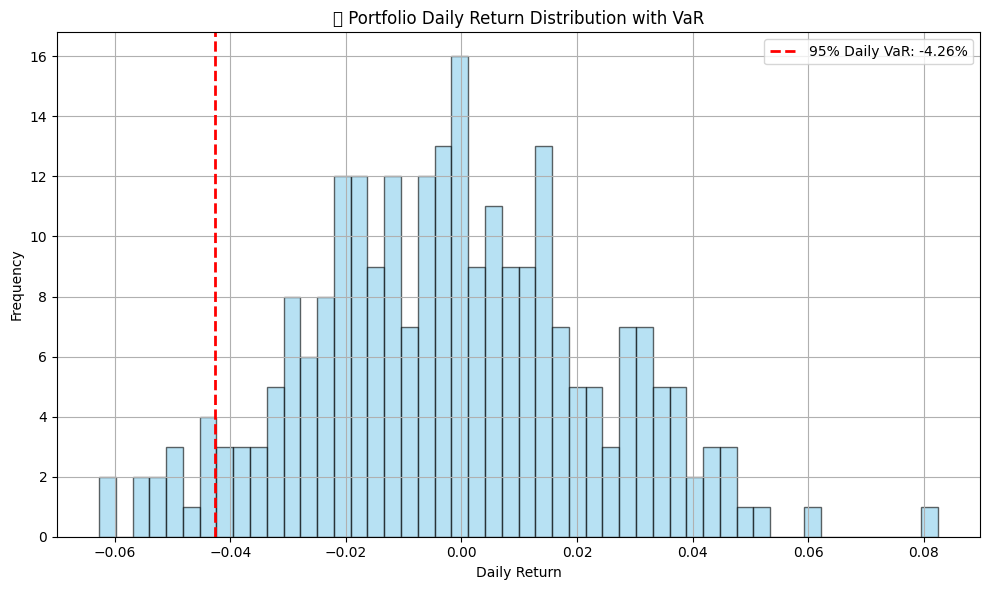

In [86]:
import matplotlib.pyplot as plt

def plot_return_distribution(portfolio_returns, var_daily, confidence_level=0.95):
    plt.figure(figsize=(10, 6))
    plt.hist(portfolio_returns, bins=50, alpha=0.6, color='skyblue', edgecolor='black')
    
    # Plot VaR line
    plt.axvline(var_daily, color='red', linestyle='dashed', linewidth=2,
                label=f'{int(confidence_level*100)}% Daily VaR: {var_daily:.2%}')
    
    # Labels and title
    plt.title('📊 Portfolio Daily Return Distribution with VaR')
    plt.xlabel('Daily Return')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call the plotting function
plot_return_distribution(portfolio_returns["Portfolio"], var_daily)


In [87]:
# Ensure portfolio_returns is calculated
portfolio_returns = (df.pct_change().dropna() * weights).sum(axis=1)

# Define mean and volatility for the portfolio
portfolio_mean = portfolio_returns.mean()
portfolio_volatility = portfolio_returns.std()

# Define cumulative returns (for current portfolio value)
cumulative_returns = (1 + portfolio_returns).cumprod()


In [88]:
def monte_carlo_simulation(start_price, mu, sigma, days=252, simulations=1000):
    """Run a Monte Carlo simulation of future stock prices."""
    results = np.zeros((days, simulations))
    
    for sim in range(simulations):
        prices = [start_price]
        for day in range(1, days):
            price = prices[-1] * np.exp(np.random.normal(loc=mu - (sigma**2)/2, scale=sigma))
            prices.append(price)
        results[:, sim] = prices

    return results

# Simulation settings
initial_price = cumulative_returns.iloc[-1]

mu = portfolio_mean
sigma = portfolio_volatility
days = 252
simulations = 1000

# Run simulation
simulated_paths = monte_carlo_simulation(initial_price, mu, sigma, days, simulations)


In [89]:
import numpy as np

# Define Monte Carlo simulation function
def run_monte_carlo_simulation(initial_price, mu, sigma, days, simulations):
    dt = 1 / days
    results = np.zeros((simulations, days))
    
    for i in range(simulations):
        prices = [initial_price]
        for _ in range(1, days):
            drift = (mu - 0.5 * sigma**2) * dt
            shock = sigma * np.random.normal() * np.sqrt(dt)
            price = prices[-1] * np.exp(drift + shock)
            prices.append(price)
        results[i] = prices
    return results


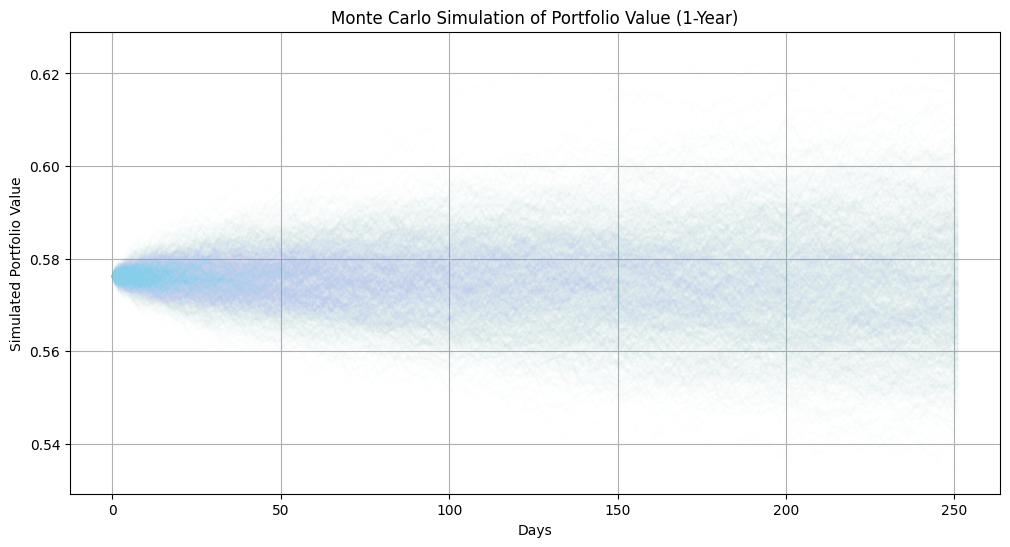

In [90]:
import matplotlib.pyplot as plt

# Run Monte Carlo simulation
simulated_paths = run_monte_carlo_simulation(initial_price, mu, sigma, days, simulations)

# Plot the simulation results
plt.figure(figsize=(12, 6))
plt.plot(simulated_paths.T, color='skyblue', alpha=0.01)  # Transpose for plotting
plt.title('Monte Carlo Simulation of Portfolio Value (1-Year)')
plt.xlabel('Days')
plt.ylabel('Simulated Portfolio Value')
plt.grid(True)
plt.show()


In [91]:
import numpy as np

# Get the ending portfolio values from all simulations
ending_values = simulated_paths[:, -1]

# Calculate the 5th percentile (VaR at 95% confidence)
VaR_95 = np.percentile(ending_values, 5)

print(f"Simulated 1-Year Value at Risk (95% confidence): {initial_price - VaR_95:.4f}")


Simulated 1-Year Value at Risk (95% confidence): 0.0238


In [92]:
# Calculate simulated 1-Year Value at Risk (VaR)
ending_values = simulated_paths[:, -1]
VaR_95_mc = np.percentile(ending_values, 5)

print(f"📉 Simulated 1-Year Value at Risk (Monte Carlo, 95% confidence):")
print(f"    ▸ Portfolio Start Value: {initial_price:.4f}")
print(f"    ▸ 5th Percentile End Value: {VaR_95_mc:.4f}")
print(f"    ▸ VaR (Potential Loss): {initial_price - VaR_95_mc:.4f}")


📉 Simulated 1-Year Value at Risk (Monte Carlo, 95% confidence):
    ▸ Portfolio Start Value: 0.5762
    ▸ 5th Percentile End Value: 0.5523
    ▸ VaR (Potential Loss): 0.0238


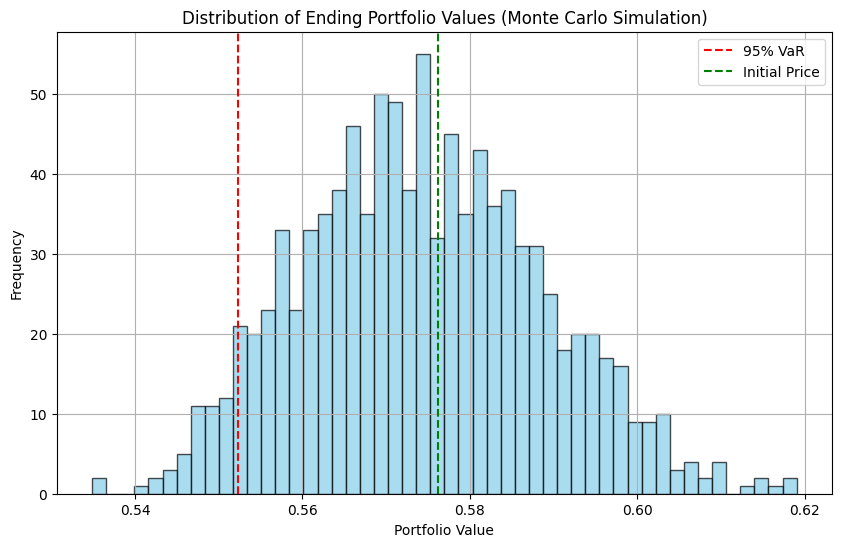

In [93]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(ending_values, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(VaR_95_mc, color='red', linestyle='--', label='95% VaR')
plt.axvline(initial_price, color='green', linestyle='--', label='Initial Price')
plt.title('Distribution of Ending Portfolio Values (Monte Carlo Simulation)')
plt.xlabel('Portfolio Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


In [94]:
# Calculate Conditional Value at Risk (CVaR) at 95% confidence level
losses = initial_price - ending_values
VaR_95_mc = np.percentile(ending_values, 5)
cvar_95_mc = losses[ending_values <= VaR_95_mc].mean()

print(f"📉 Conditional Value at Risk (CVaR) at 95% confidence level:")
print(f"    ▸ CVaR: {cvar_95_mc:.4f}")


📉 Conditional Value at Risk (CVaR) at 95% confidence level:
    ▸ CVaR: 0.0284


In [95]:
# Compute daily returns from simulated ending values
simulated_returns = (ending_values - initial_price) / initial_price

# Sharpe Ratio
risk_free_rate = 0.01  # Assuming 1% annual risk-free return
sharpe_ratio = (simulated_returns.mean() - risk_free_rate) / simulated_returns.std()

# Sortino Ratio
downside_returns = simulated_returns[simulated_returns < 0]
sortino_ratio = (simulated_returns.mean() - risk_free_rate) / downside_returns.std()

# Maximum Drawdown (for the worst path)
worst_path = simulated_paths[np.argmin(ending_values)]
running_max = np.maximum.accumulate(worst_path)
drawdowns = (worst_path - running_max) / running_max
max_drawdown = drawdowns.min()

# Calmar Ratio
calmar_ratio = simulated_returns.mean() / abs(max_drawdown)

# Print results
print(f"📊 Risk-Adjusted Performance Metrics:")
print(f"    ▸ Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"    ▸ Sortino Ratio: {sortino_ratio:.2f}")
print(f"    ▸ Maximum Drawdown: {max_drawdown:.2%}")
print(f"    ▸ Calmar Ratio: {calmar_ratio:.2f}")


📊 Risk-Adjusted Performance Metrics:
    ▸ Sharpe Ratio: -0.53
    ▸ Sortino Ratio: -0.92
    ▸ Maximum Drawdown: -7.38%
    ▸ Calmar Ratio: -0.04
